In [16]:
import pandas as pd
import numpy as np 
import copy
from matplotlib import pyplot as plt
import seaborn as sns
from collections import *

In [17]:
data=pd.read_csv(r"C:\Users\Mark 1\Desktop\Lockdown\data\Covid-19\31\case_time_series.csv")
data.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [18]:
data[data.duplicated()]

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [19]:
data_aug=data[184:]
data_aug.reset_index(inplace=True,drop=True)
data_aug

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,01 August,55117,1752185,51368,1146906,854,37420
1,02 August,52531,1804716,40213,1187119,756,38176


In [20]:
count1=0
for i in list(data_aug.columns):
    if((True== "NaN" in data_aug[i])or (True == "" in data_aug[i]) or (True == " " in data_aug[i]) or (True == "?" in  data_aug[i])or (True == "####" in data_aug[i])):
        count1=count1+1
if(count1):
    print("yes")
    

In [21]:
colls=data_aug.columns
colls

Index(['Date', 'Daily Confirmed', 'Total Confirmed', 'Daily Recovered',
       'Total Recovered', 'Daily Deceased', 'Total Deceased'],
      dtype='object')

In [22]:
for i in range(len(data_aug)):
    data_aug["Date"][i]=data_aug["Date"][i].strip(" August")

for i in range(len(data_aug)):
    data_aug["Date"][i]="2020-07-"+data_aug["Date"][i]

    
data_aug['Date'] = data_aug['Date'].astype('datetime64[ns]') 
data_aug.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [23]:
data_aug.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [30]:
data_aug.to_excel("coviddata_aug.xlsx")

['Daily Confirmed',
 'Total Confirmed',
 'Daily Recovered',
 'Total Recovered',
 'Daily Deceased',
 'Total Deceased']

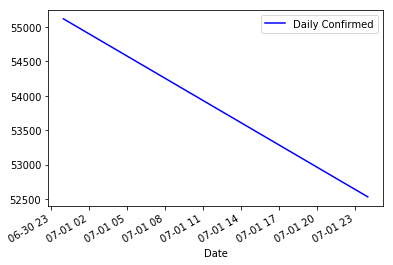

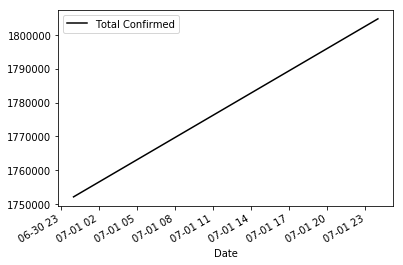

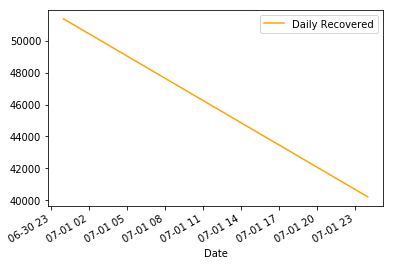

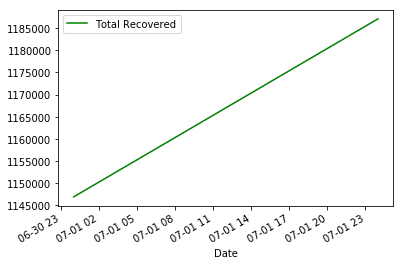

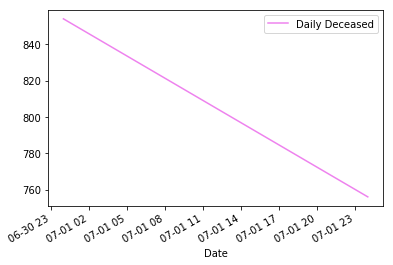

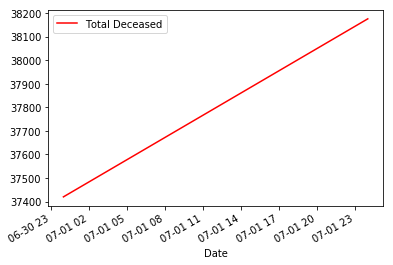

In [33]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n)
colss

In [35]:
dataaug_for_scattering=data_aug.copy()
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [38]:
dataaug_for_scattering["Date_tmp"]=pd.Series(list(range(1,len(dataaug_for_scattering)+1)),index=list(range(0,len(dataaug_for_scattering))))
dataaug_for_scattering['Date_tmp'] = dataaug_for_scattering['Date_tmp'].astype('int')
colls=list(dataaug_for_scattering.columns)
colls.pop(0)
colls.pop(len(colls)-1)
dataaug_for_scattering.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Date_tmp
0,2020-07-01,55117,1752185,51368,1146906,854,37420,1
1,2020-07-02,52531,1804716,40213,1187119,756,38176,2


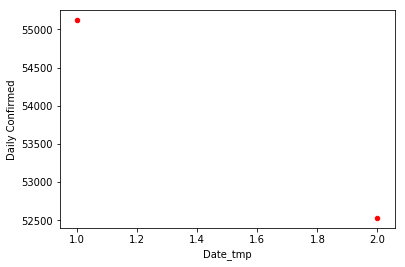

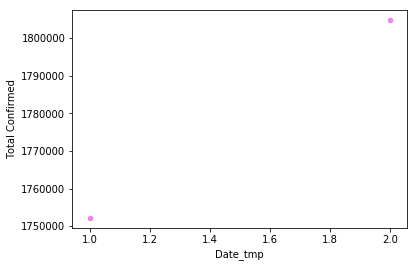

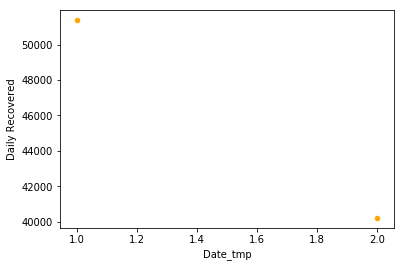

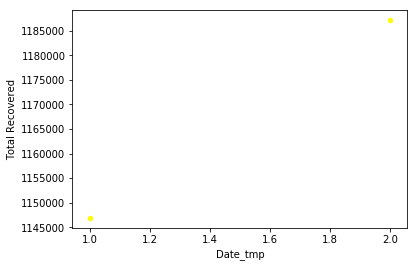

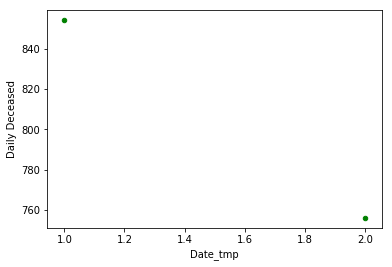

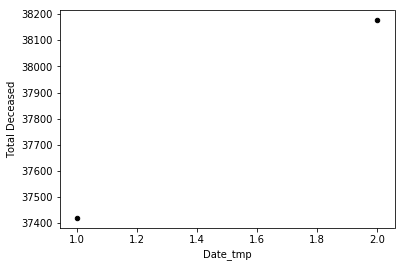

In [39]:
colors=["Red","Violet","Orange","Yellow","Green","Black"]
for i,j in zip(colls,colors):
    dataaug_for_scattering.plot(x="Date_tmp",y=i,kind="scatter",color=j)

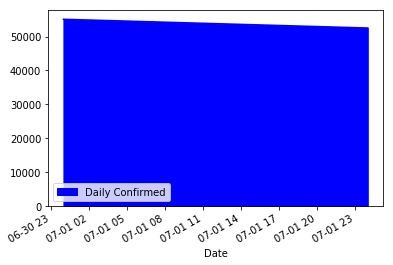

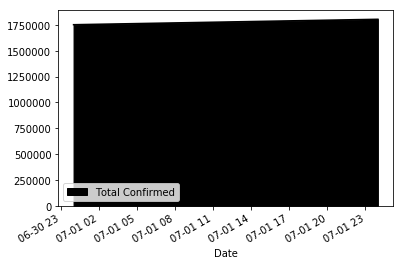

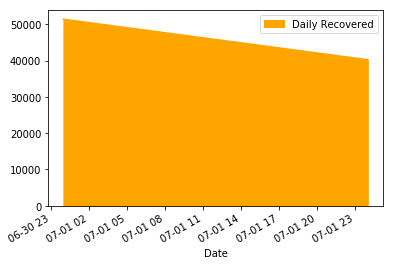

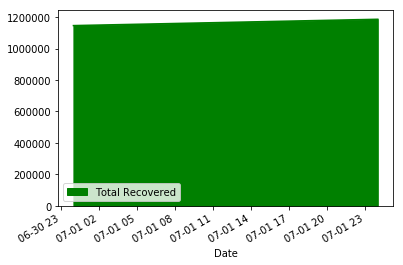

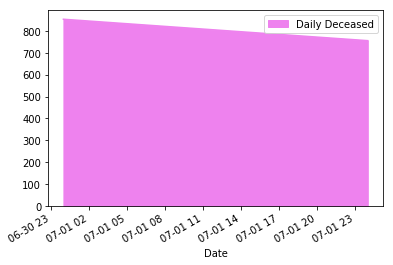

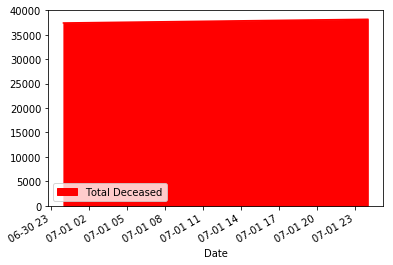

In [42]:
colss=list(data_aug.columns)
colss.pop(0)
for m,n in zip(colss,["blue","black","orange","green","violet","red"]):
    data_aug.plot(x="Date",y=m,color=n,kind="area")

In [43]:
dataaug_diff=data_aug.copy()
dataaug_diff.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [47]:
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
existing_cols=list(dataaug_diff.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_diff[i]=list(range(len(dataaug_diff)))
    dataaug_diff[i][0]=dataaug_diff[j][0]-l
    for k in range(0,len(dataaug_diff)-1):
        dataaug_diff[i][k+1]=dataaug_diff[j][k+1]-dataaug_diff[j][k]
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
dataaug_diff.tail()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
0,2020-07-01,55117,1752185,51368,1146906,854,37420,-2095,55391,14814,51368,90,854
1,2020-07-02,52531,1804716,40213,1187119,756,38176,-2586,52531,-11155,40213,-98,756


In [49]:
dataaug_diff["Total Confirmed"][1]-dataaug_diff["Total Confirmed"][0]==dataaug_diff["Total_Confirmed_Diff"][1]

True

In [51]:
dataaug_diff.describe()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Diff,Total_Confirmed_Diff,Daily_Recovered_Diff,Total_Recovered_Diff,Daily_Deceased_Diff,Total_Deceased_diff
count,2.000000,2.000000e+00,2.000000,2.000000e+00,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,53824.000000,1.778450e+06,45790.500000,1.167012e+06,805.000000,37798.000000,-2340.50000,53961.000000,1829.500000,45790.500000,-4.000000,805.000000
std,1828.578136,3.714503e+04,7887.776144,2.843488e+04,69.296465,534.572727,347.18943,2022.325394,18362.856001,7887.776144,132.936075,69.296465
min,52531.000000,1.752185e+06,40213.000000,1.146906e+06,756.000000,37420.000000,-2586.00000,52531.000000,-11155.000000,40213.000000,-98.000000,756.000000
25%,53177.500000,1.765318e+06,43001.750000,1.156959e+06,780.500000,37609.000000,-2463.25000,53246.000000,-4662.750000,43001.750000,-51.000000,780.500000
50%,53824.000000,1.778450e+06,45790.500000,1.167012e+06,805.000000,37798.000000,-2340.50000,53961.000000,1829.500000,45790.500000,-4.000000,805.000000
75%,54470.500000,1.791583e+06,48579.250000,1.177066e+06,829.500000,37987.000000,-2217.75000,54676.000000,8321.750000,48579.250000,43.000000,829.500000
max,55117.000000,1.804716e+06,51368.000000,1.187119e+06,854.000000,38176.000000,-2095.00000,55391.000000,14814.000000,51368.000000,90.000000,854.000000


In [52]:
kys=["daily_cnf_diff_pos_neg","total_cnf_diff_pos_neg","daily_rcvd_diff_pos_neg","total_rcvd_diff_pos_neg","daily_dcsd_diff_pos_neg","total_dcsd_diff_pos_neg"]
new_cols=["Daily_Confirmed_Diff","Total_Confirmed_Diff","Daily_Recovered_Diff","Total_Recovered_Diff","Daily_Deceased_Diff","Total_Deceased_diff"]
pos_neg_dict={}
pos_neg_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_diff[dataaug_diff[j]>0]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_diff[dataaug_diff[j]<0]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_diff[dataaug_diff[j]==0]
    a.append(zro)
    b.append(len(zro))
    pos_neg_dict.update({i:a})
    pos_neg_len_dict.update({i:b})
    a=[]
    b=[]



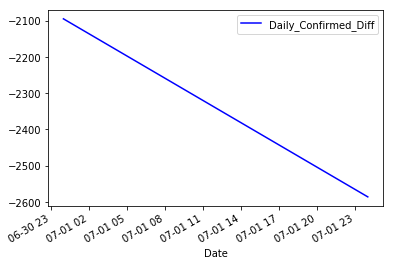

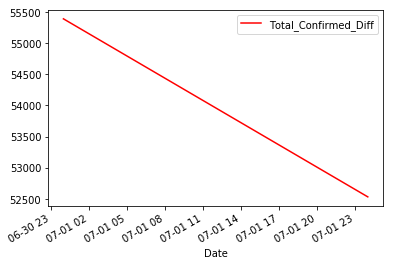

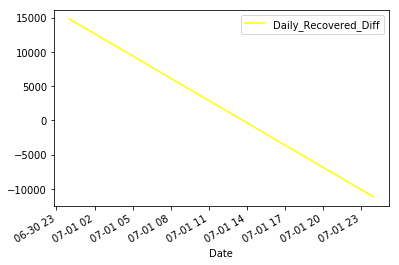

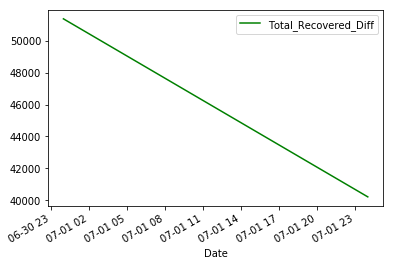

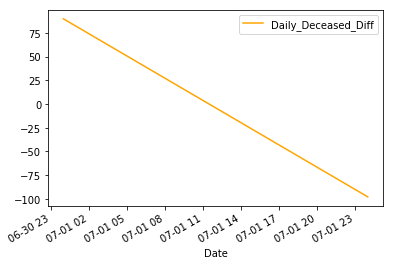

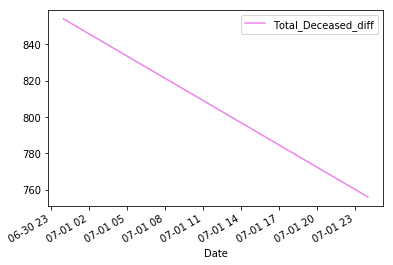

In [53]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_diff.plot(x="Date",y=i,color=j)

In [54]:
dataaug_diff.to_excel("dataaug_diff.xlsx")

In [55]:
dataaug_ratio_with_precision=data_aug.copy()
dataaug_ratio_with_precision.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [57]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio_with_precision.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio_with_precision[i]=list(range(len(dataaug_ratio_with_precision)))
    dataaug_ratio_with_precision[i][0]=round(dataaug_ratio_with_precision[j][0]/l,2)
    tmp=[]
    tmp.append(dataaug_ratio_with_precision[i][0])
    for k in range(0,len(dataaug_ratio_with_precision)-1):
        tmp.append(round(dataaug_ratio_with_precision[j][k+1]/dataaug_ratio_with_precision[j][k],2))
    dataaug_ratio_with_precision[i]=tmp
dataaug_ratio_with_precision.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,55117,1752185,51368,1146906,854,37420,0.00,1.00,1.00,1.00,1.00,1.00
1,2020-07-02,52531,1804716,40213,1187119,756,38176,0.95,1.03,0.78,1.04,0.89,1.02


In [58]:
round(dataaug_ratio_with_precision["Total Confirmed"][1]/dataaug_ratio_with_precision["Total Confirmed"][0],2)==dataaug_ratio_with_precision["Total_Confirmed_Ratio"][1]

True

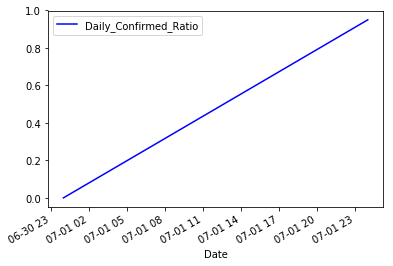

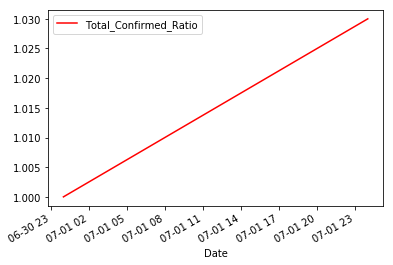

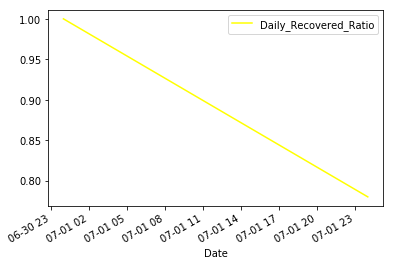

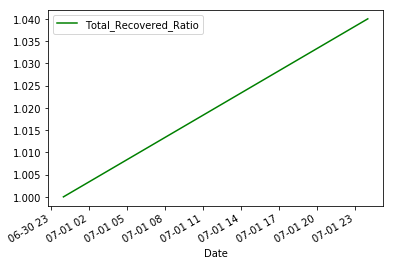

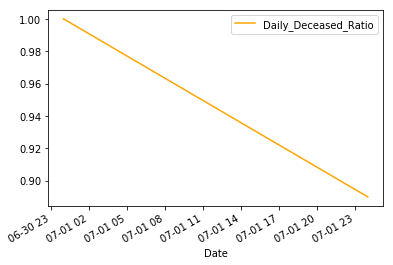

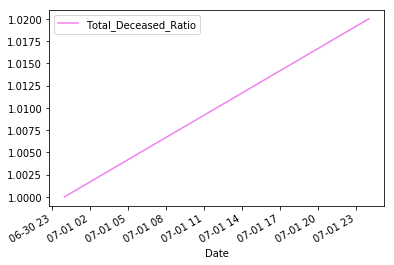

In [59]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio_with_precision.plot(x="Date",y=i,color=j)

In [60]:
dataaug_ratio_with_precision.to_excel("dataaug_ratio_with_precision.xlsx")

In [61]:
dataaug_ratio=data_aug.copy()
dataaug_ratio.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176


In [62]:
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
existing_cols=list(dataaug_ratio.columns)
existing_cols.pop(0)
existing_cols
prv_vals=[57212,1696794,36554,1095538,764,36566]
for i,j,l in zip(new_cols,existing_cols,prv_vals):
    dataaug_ratio[i]=list(range(len(dataaug_ratio)))
    dataaug_ratio[i][0]=dataaug_ratio[j][0]/l
    tmp=[]
    tmp.append(dataaug_ratio[i][0])
    for k in range(0,len(dataaug_ratio)-1):
        tmp.append(dataaug_ratio[j][k+1]/dataaug_ratio[j][k])
    dataaug_ratio[i]=tmp
dataaug_ratio.head()
        

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Daily_Confirmed_Ratio,Total_Confirmed_Ratio,Daily_Recovered_Ratio,Total_Recovered_Ratio,Daily_Deceased_Ratio,Total_Deceased_Ratio
0,2020-07-01,55117,1752185,51368,1146906,854,37420,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
1,2020-07-02,52531,1804716,40213,1187119,756,38176,0.953082,1.02998,0.782841,1.035062,0.885246,1.020203


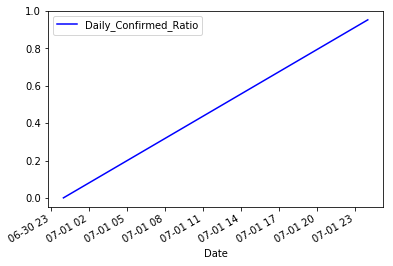

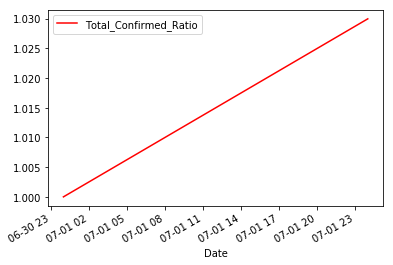

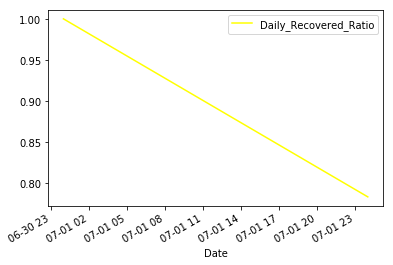

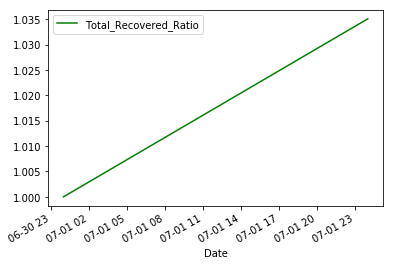

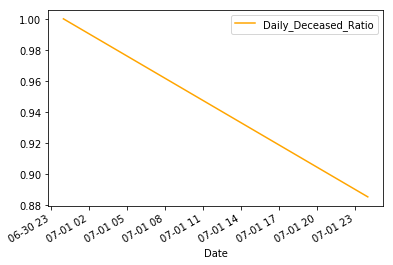

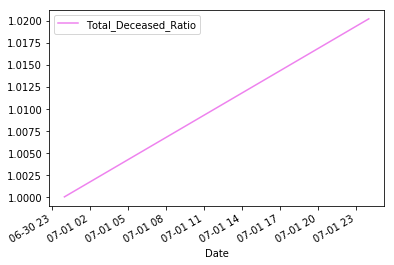

In [63]:
colors=["Blue","Red","Yellow","Green","Orange","Violet"]
for i,j in zip(new_cols,colors):
    dataaug_ratio.plot(x="Date",y=i,color=j)

In [64]:
kys=["daily_cnf_diff_rat10","total_cnf_diff_rat10","daily_rcvd_diff_rat10","total_rcvd_diff_rat10","daily_dcsd_diff_rat10","total_dcsd_diff_rat10"]
new_cols=["Daily_Confirmed_Ratio","Total_Confirmed_Ratio","Daily_Recovered_Ratio","Total_Recovered_Ratio","Daily_Deceased_Ratio","Total_Deceased_Ratio"]
one_zro_dict={}
one_zro_len_dict={}
a=[]
b=[]
for i,j in zip(kys,new_cols):
    pos=dataaug_ratio[dataaug_ratio[j]>=1]
    a.append(pos)
    b.append(len(pos))
    neg=dataaug_ratio[dataaug_ratio[j]<1]
    a.append(neg)
    b.append(len(neg))
    zro=dataaug_ratio[dataaug_ratio[j]==0]
    a.append(zro)
    b.append(len(zro))
    one_zro_dict.update({i:a})
    one_zro_len_dict.update({i:b})
    a=[]
    b=[]




In [65]:
dataaug_ratio.to_excel("dataaug_ratio.xlsx")

In [67]:
dataaug_ratio_analysis=data_aug.copy()
dataaug_ratio_analysis.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,2020-07-01,55117,1752185,51368,1146906,854,37420
1,2020-07-02,52531,1804716,40213,1187119,756,38176
